<h2>Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка</h2>

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [16]:
import pandas as pd
import numpy as np

observations = 20
data_1 = np.random.normal(0, 100, observations)
data_2 = np.random.normal(0, 50, observations)
data_3 = np.random.normal(0, 10, observations)
data_4 = np.random.uniform(-100, 100, observations)
data_5 = np.random.uniform(-50, 50, observations)
data_6 = np.random.uniform(-1, 10, observations)

Data = pd.DataFrame({
    'data_1_normal': data_1,
    'data_2_normal': data_2,
    'data_3_normal': data_3,
    'data_4_not': data_4,
    'data_5_not': data_5,
    'data_6_not': data_6
})

Data

,data_1_normal,data_2_normal,data_3_normal,data_4_not,data_5_not,data_6_not
0,-48.688852,-75.411767,18.240097,80.436328,45.153103,1.160261
1,43.461303,-36.655935,-15.691847,64.630735,35.000874,0.328785
2,76.780689,70.782864,16.045350,-59.984988,-42.456907,5.910977
3,80.921292,-14.997923,-25.468132,-92.592982,15.504718,7.088557
4,232.997841,55.062069,13.994203,-75.055367,-45.299913,-0.939571
5,-21.644467,-11.591474,-8.842175,-40.480612,4.616427,-0.893355
6,23.070261,-6.391720,-8.917170,-24.406267,32.834409,4.066633
7,52.177737,42.979649,5.465435,75.599862,-14.801550,0.326613
8,76.902046,90.758922,13.757762,-97.894545,-4.925734,0.520836
9,65.358117,43.519313,9.521197,-56.714067,-42.134527,1.951276


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.

In [17]:
def mean(data):
    sum = 0
    length = len(data)
    for i in range(length):
        sum += data[i]
    return sum/length

def ShapiroWilk(data_unsorted, a, W_alpha):
    data = []
    for i in range(len(data_unsorted)):
        data.append(data_unsorted[i])
    data.sort()
    
    s2 = 0
    for i in range(len(data)):
        s2 += (data[i] - mean(data))**2
        
    W_numerator = 0
    for i in range(len(a)):
        W_numerator += a[i]*(data[len(data) - i - 1] - data[i])
    W = (W_numerator**2)/s2
    return W

exc = pd.read_excel("Coeficients for the W test for normality.xlsx")[observations]/10000
W_alpha = pd.read_excel("Рoints of the distribution of W.xlsx")[ 'Unnamed: 1'][observations]/1000

var = [exc[i] for i in range(observations//2)]

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.

In [18]:
Table = pd.DataFrame(columns = ["Variable", "Statistics", "Distribution"])

Table

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [19]:
Table["Variable"] = Data.keys()

Table

,Variable,Statistics,Distribution
0,data_1_normal,NaN,NaN
1,data_2_normal,NaN,NaN
2,data_3_normal,NaN,NaN
3,data_4_not,NaN,NaN
4,data_5_not,NaN,NaN
5,data_6_not,NaN,NaN


5. Занести в стовпчик Distribution результати роботи критерію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [20]:
Table["Distribution"] = [str(ShapiroWilk(Data[Data.keys()[i]], var, W_alpha))+
                         (" : normal" if i < 3 else " : non-normal") for i in range(6)]
Table

,Variable,Statistics,Distribution
0,data_1_normal,NaN,0.9462745783002884 : normal
1,data_2_normal,NaN,0.9501069991341302 : normal
2,data_3_normal,NaN,0.9344235135871092 : normal
3,data_4_not,NaN,0.8489528211007273 : non-normal
4,data_5_not,NaN,0.8993172390648813 : non-normal
5,data_6_not,NaN,0.884259362418317 : non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [26]:
for i in range(6):
    if i < 3:
        Table["Statistics"][i] = str(round(mean(Data[Data.keys()[i]]), 1)) + " [" + str(round(Data[Data.keys()[i]].std(), 1)) + "]"
    else:
        Table["Statistics"][i] = str(round(Data[Data.keys()[i]].median(), 1)) + " [" + str(round(Data[Data.keys()[i]].quantile(0.25), 1)) + " ; " + str(round(Data[Data.keys()[i]].quantile(0.75), 1)) + "]"

Table

,Variable,Statistics,Distribution
0,data_1_normal,4.9 [87.6],0.9462745783002884 : normal
1,data_2_normal,14.1 [46.3],0.9501069991341302 : normal
2,data_3_normal,0.4 [12.9],0.9344235135871092 : normal
3,data_4_not,-45.1 [-72.4 ; 33.9],0.8489528211007273 : non-normal
4,data_5_not,10.1 [-18.1 ; 33.4],0.8993172390648813 : non-normal
5,data_6_not,1.7 [0.2 ; 5.3],0.884259362418317 : non-normal


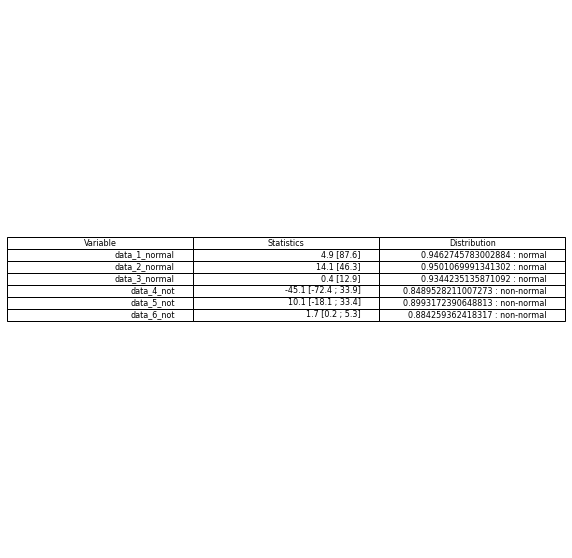

In [28]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

fig, ax = plt.subplots(figsize = (10,10))
ax.axis('tight'); ax.axis('off')
ax.table(cellText = Table.values, colLabels = Table.columns, loc = 'center')

pp = PdfPages("Data.pdf")
pp.savefig(fig, bbox_inches = 'tight')
pp.close()